In [4]:
# Library 불러오기
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes = True)
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow.python.keras.callbacks import TensorBoard # tensorboard Import
from time import time ## log 만들때 사용

from numpy.random import seed
tf.set_random_seed(1234)

from keras.layers import Input, Dropout
from keras.layers.core import Dense
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [5]:
# 파일 불러오기
df = pd.read_csv("D:/python/Anomaly Detection/dataset/ecs_data.csv", sep=',')
df.head()

,Unnamed: 0,공장명,센서명,센서위치,Asset,센서종류,단위,발생일시,발생치,주의치,위험치
0,0,"1,2코크스",ECS FAN 2A,MOTOR-NDE,4K1006067,진동(속도),mm/s,2020-02-01 15:00,0.28,2.5,4.0
1,1,"1,2코크스",ECS FAN 2A,MOTOR-NDE,4K1006067,진동(속도),mm/s,2020-02-01 16:00,0.20,2.5,4.0
2,2,"1,2코크스",ECS FAN 2A,MOTOR-NDE,4K1006067,진동(속도),mm/s,2020-02-01 17:00,0.28,2.5,4.0
3,3,"1,2코크스",ECS FAN 2A,MOTOR-NDE,4K1006067,진동(속도),mm/s,2020-02-01 18:00,0.26,2.5,4.0
4,4,"1,2코크스",ECS FAN 2A,MOTOR-NDE,4K1006067,진동(속도),mm/s,2020-02-01 19:00,0.27,2.5,4.0


In [6]:
# Data Format 수정(날짜)
df_raw = df
#df_raw.index = pd.to_datetime(df_raw["발생일시"], format='%Y-%m-%d %H:%M')
df_raw["id"]= df_raw["센서위치"]+ df_raw["센서종류"]
df_raw.head()

,Unnamed: 0,공장명,센서명,센서위치,Asset,센서종류,단위,발생일시,발생치,주의치,위험치,id
0,0,"1,2코크스",ECS FAN 2A,MOTOR-NDE,4K1006067,진동(속도),mm/s,2020-02-01 15:00,0.28,2.5,4.0,MOTOR-NDE진동(속도)
1,1,"1,2코크스",ECS FAN 2A,MOTOR-NDE,4K1006067,진동(속도),mm/s,2020-02-01 16:00,0.20,2.5,4.0,MOTOR-NDE진동(속도)
2,2,"1,2코크스",ECS FAN 2A,MOTOR-NDE,4K1006067,진동(속도),mm/s,2020-02-01 17:00,0.28,2.5,4.0,MOTOR-NDE진동(속도)
3,3,"1,2코크스",ECS FAN 2A,MOTOR-NDE,4K1006067,진동(속도),mm/s,2020-02-01 18:00,0.26,2.5,4.0,MOTOR-NDE진동(속도)
4,4,"1,2코크스",ECS FAN 2A,MOTOR-NDE,4K1006067,진동(속도),mm/s,2020-02-01 19:00,0.27,2.5,4.0,MOTOR-NDE진동(속도)


In [8]:
df_raw2 = df_raw
df_raw2['발생일시'] = pd.to_datetime(df_raw2['발생일시'], format = '%Y-%m-%d %H:%M')
df_raw2.index = df_raw2['발생일시']
df_raw2.head()

,Unnamed: 0,공장명,센서명,센서위치,Asset,센서종류,단위,발생일시,발생치,주의치,위험치,id
발생일시,,,,,,,,,,,,
2020-02-01 15:00:00,0,"1,2코크스",ECS FAN 2A,MOTOR-NDE,4K1006067,진동(속도),mm/s,2020-02-01 15:00:00,0.28,2.5,4.0,MOTOR-NDE진동(속도)
2020-02-01 16:00:00,1,"1,2코크스",ECS FAN 2A,MOTOR-NDE,4K1006067,진동(속도),mm/s,2020-02-01 16:00:00,0.20,2.5,4.0,MOTOR-NDE진동(속도)
2020-02-01 17:00:00,2,"1,2코크스",ECS FAN 2A,MOTOR-NDE,4K1006067,진동(속도),mm/s,2020-02-01 17:00:00,0.28,2.5,4.0,MOTOR-NDE진동(속도)
2020-02-01 18:00:00,3,"1,2코크스",ECS FAN 2A,MOTOR-NDE,4K1006067,진동(속도),mm/s,2020-02-01 18:00:00,0.26,2.5,4.0,MOTOR-NDE진동(속도)
2020-02-01 19:00:00,4,"1,2코크스",ECS FAN 2A,MOTOR-NDE,4K1006067,진동(속도),mm/s,2020-02-01 19:00:00,0.27,2.5,4.0,MOTOR-NDE진동(속도)


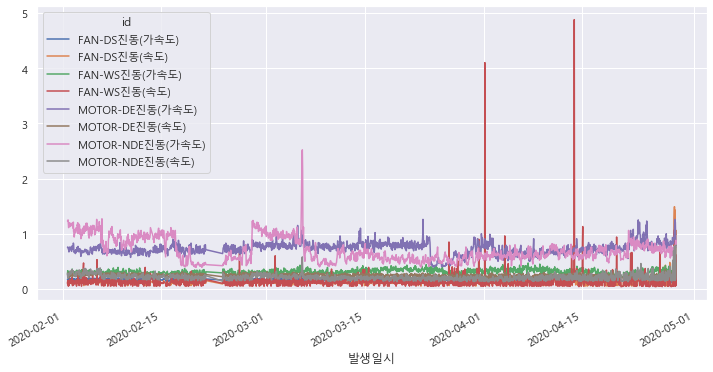

In [9]:
# 데이터 정리(날짜기준)

df_raw3 = df_raw2.pivot(index= '발생일시', columns='id', values='발생치')
df_raw3.plot(figsize=(12,6))

In [10]:
df_raw3.head()

id,FAN-DS진동(가속도),FAN-DS진동(속도),FAN-WS진동(가속도),FAN-WS진동(속도),MOTOR-DE진동(가속도),MOTOR-DE진동(속도),MOTOR-NDE진동(가속도),MOTOR-NDE진동(속도)
발생일시,,,,,,,,
2020-02-01 15:00:00,0.17,0.11,0.28,0.09,0.75,0.27,1.23,0.28
2020-02-01 16:00:00,0.18,0.14,0.33,0.15,0.76,0.24,1.24,0.20
2020-02-01 17:00:00,0.16,0.10,0.30,0.10,0.75,0.29,1.25,0.28
2020-02-01 18:00:00,0.13,0.06,0.25,0.05,0.72,0.20,1.17,0.26
2020-02-01 19:00:00,0.18,0.14,0.30,0.14,0.71,0.25,1.11,0.27


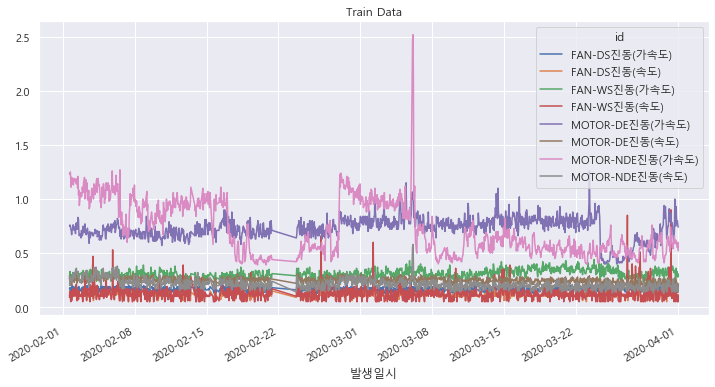

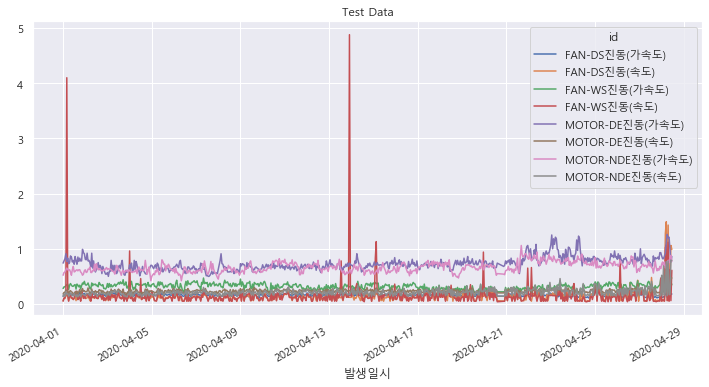

In [12]:
df_train = df_raw3['2020-02-01 15:00:00' : '2020-04-01 00:00:00']
df_test = df_raw3['2020-04-01 00:00:00' :]
df_train.plot(figsize = (12,6), title = 'Train Data')
df_test.plot(figsize= (12,6), title= 'Test Data')

# Data Scaling(Normalize)

In [13]:
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(df_train),
                      columns = df_train.columns,
                      index = df_train.index)

# Random Shuffle training data
X_train.sample(frac=1)
X_test = pd.DataFrame(scaler.transform(df_test),
                     columns = df_test.columns,
                     index = df_test.index)

In [14]:
seed(10)
act_func = 'elu'
keras.backend.clear_session()  
# Input Layer :
model2 = Sequential(name = "mymodel")

# 첫번째 Hidden Layer > Input Data에 연결
model2.add(Dense(10, activation = act_func,
               kernel_initializer = 'glorot_uniform',
               kernel_regularizer = regularizers.l2(0.0),
               input_shape = (X_train.shape[1],),
               name = "Layer1Encoder"
               )
         )
model2.add(Dense(2,activation=act_func,
               kernel_initializer = 'glorot_uniform',
                name = "Layer2Compressed"))
model2.add(Dense(10, activation = act_func,
               kernel_initializer = 'glorot_uniform',
                name = "Layer3Decoder"))
model2.add(Dense(X_train.shape[1],
               kernel_initializer = 'glorot_uniform',
                name = "Output"))

tensorboard = TensorBoard(log_dir = 'logss/{}'.format(time())) # Tensorboard
model2.compile(loss='mse', optimizer = 'adam')

# Train 설정
NUM_EPOCHS = 100
BATCH_SIZE = 10

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
model2.summary()

Model: "mymodel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1Encoder (Dense)        (None, 10)                90        
_________________________________________________________________
Layer2Compressed (Dense)     (None, 2)                 22        
_________________________________________________________________
Layer3Decoder (Dense)        (None, 10)                30        
_________________________________________________________________
Output (Dense)               (None, 8)                 88        
Total params: 230
Trainable params: 230
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Fitting the model

history = model2.fit(np.array(X_train), np.array(X_train),
                   batch_size = BATCH_SIZE,
                   epochs = NUM_EPOCHS,
                   validation_split = 0.05,
                   verbose = 1,
                   )

Train on 1283 samples, validate on 68 samples
Epoch 1/100
1283/1283 [==============================] - 0s 225us/step - loss: 0.2119 - val_loss: 0.0371
Epoch 2/100
1283/1283 [==============================] - 0s 105us/step - loss: 0.0259 - val_loss: 0.0237
Epoch 3/100
1283/1283 [==============================] - 0s 113us/step - loss: 0.0167 - val_loss: 0.0212
Epoch 4/100
1283/1283 [==============================] - 0s 184us/step - loss: 0.0144 - val_loss: 0.0181
Epoch 5/100
1283/1283 [==============================] - 0s 146us/step - loss: 0.0124 - val_loss: 0.0157
Epoch 6/100
1283/1283 [==============================] - 0s 145us/step - loss: 0.0106 - val_loss: 0.0138
Epoch 7/100
1283/1283 [==============================] - 0s 132us/step - loss: 0.0092 - val_loss: 0.0121
Epoch 8/100
1283/1283 [==============================] - 0s 102us/step - loss: 0.0082 - val_loss: 0.0110
Epoch 9/100
1283/1283 [==============================] - 0s 106us/step - loss: 0.0075 - val_loss: 0.0098
Epoch 10/

1283/1283 [==============================] - 0s 93us/step - loss: 0.0051 - val_loss: 0.0073
Epoch 79/100
1283/1283 [==============================] - 0s 89us/step - loss: 0.0051 - val_loss: 0.0074
Epoch 80/100
1283/1283 [==============================] - 0s 128us/step - loss: 0.0051 - val_loss: 0.0074
Epoch 81/100
1283/1283 [==============================] - 0s 117us/step - loss: 0.0051 - val_loss: 0.0075
Epoch 82/100
1283/1283 [==============================] - 0s 106us/step - loss: 0.0051 - val_loss: 0.0074
Epoch 83/100
1283/1283 [==============================] - 0s 96us/step - loss: 0.0051 - val_loss: 0.0074
Epoch 84/100
1283/1283 [==============================] - 0s 111us/step - loss: 0.0051 - val_loss: 0.0076
Epoch 85/100
1283/1283 [==============================] - 0s 89us/step - loss: 0.0051 - val_loss: 0.0073
Epoch 86/100
1283/1283 [==============================] - 0s 93us/step - loss: 0.0051 - val_loss: 0.0073
Epoch 87/100
1283/1283 [==============================] - 0s 106

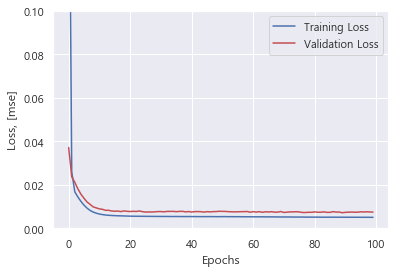

In [18]:
plt.plot(history.history['loss'],'b',
        label= 'Training Loss')
plt.plot(history.history['val_loss'],'r',
        label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.1])
plt.show()

(0.0, 0.5)

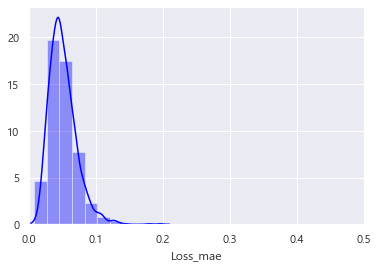

In [19]:
# Training Set에서 Loss Function 분포확인

X_pred = model2.predict(np.array(X_train))
X_pred = pd.DataFrame(X_pred, columns=X_train.columns)
X_pred.index = X_train.index

scored = pd.DataFrame(index = X_train.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis= 1)

plt.figure()
sns.distplot(scored['Loss_mae'],
            bins= 10,
            kde=True,
            color = 'blue');
plt.xlim([0.0,.5])

In [20]:
# 위 loss 분포를 통해 threshold를 0.2로 설정해도 문제없음
X_pred = model2.predict(np.array(X_test))
X_pred = pd.DataFrame(X_pred, columns=X_test.columns)
X_pred.index = X_test.index

scored = pd.DataFrame(index=X_test.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis=1)
scored['Threshold'] = 0.2
scored['Anomaly'] = scored['Loss_mae']>scored['Threshold']
scored.head()

,Loss_mae,Threshold,Anomaly
발생일시,,,
2020-04-01 00:00:00,0.049097,0.2,False
2020-04-01 01:00:00,0.047084,0.2,False
2020-04-01 02:00:00,0.072343,0.2,False
2020-04-01 03:00:00,0.065423,0.2,False
2020-04-01 04:00:00,0.936638,0.2,True


In [21]:
X_pred_train = model2.predict(np.array(X_train))
X_pred_train = pd.DataFrame(X_pred_train, columns=X_train.columns)
X_pred_train.index = X_train.index

scored_train = pd.DataFrame(index=X_train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis=1)
scored_train['Threshold']= 0.2
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']

scored = pd.concat([scored_train, scored])


In [24]:
scored.to_csv('D:/python/Anomaly Detection/results/ecs.csv')

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


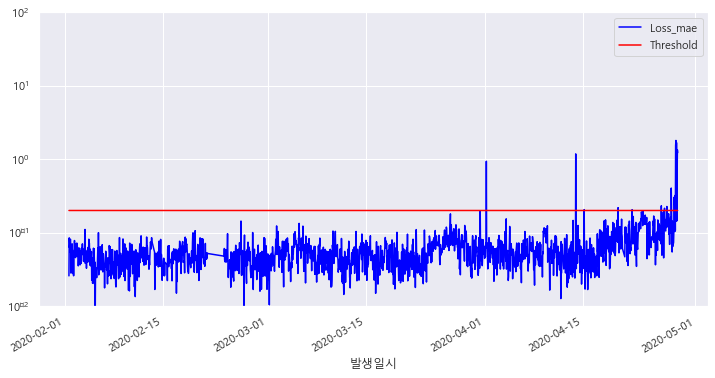

In [22]:
scored.plot(logy=True, figsize = (12,6), ylim=[1e-2, 1e2], color = ['blue', 'red'])